# Linear Regression (Mean Squared Error) #

## Model ##
$f_{\vec{\omega}\ ,b}\left(\vec{x}\right)=\vec{\omega}\cdot\vec{x}+b$
## Cost / Loss Functions ##
$J(\vec{\omega},b) = \frac{1}{2m} \sum_{i=1}^{m} \left[f_{\vec{\omega},b}(\vec{x}^{(i)}) - y^{(i)}\right]^2$

Alternatively,

$J(\vec{\omega},b) = \frac{1}{m} \sum_{i=1}^{m} \left[f_{\vec{\omega},b}(\vec{x}^{(i)}) - y^{(i)}\right]^2$

## Gradient ##
$\frac{\partial J\left(\vec{\omega},b\right)}{\partial\omega}=\frac{1}{m}\sum_{i=0}^{m-1}\left[\left(f_{\vec{\omega},b}\left({\vec{x}}^{\left(i\right)}\right)-y^{\left(i\right)}\right){\vec{x}}^{\left(i\right)}\right]$

$\frac{\partial J\left(\vec{\omega},b\right)}{\partial b}=\frac{1}{m}\sum_{i=0}^{m-1}\left[f_{\vec{\omega},b}\left({\vec{x}}^{\left(i\right)}\right)-y^{\left(i\right)}\right]$

Alternatively,

$\frac{\partial J\left(\vec{\omega},b\right)}{\partial\omega}=\frac{2}{m}\sum_{i=0}^{m-1}\left[\left(f_{\vec{\omega},b}\left({\vec{x}}^{\left(i\right)}\right)-y^{\left(i\right)}\right){\vec{x}}^{\left(i\right)}\right]$

$\frac{\partial J\left(\vec{\omega},b\right)}{\partial b}=\frac{2}{m}\sum_{i=0}^{m-1}\left[f_{\vec{\omega},b}\left({\vec{x}}^{\left(i\right)}\right)-y^{\left(i\right)}\right]$

## Gradient Descent ##
$\vec{\omega}'=\vec{\omega}-\alpha\frac{\partial J\left(\omega,b\right)}{\partial\omega}$

$b'=b-\alpha\frac{\partial J(\omega,b)}{\partial b}$

Alternative notation,

$\vec{\omega}:=\vec{\omega}-\alpha\frac{\partial J\left(\omega,b\right)}{\partial\omega}$

$b:= b-\alpha\frac{\partial J(\omega,b)}{\partial b}$

## Regularized Linear Regression ##
$\frac{\partial J\left(\vec{\omega},b\right)}{\partial\omega}=\frac{1}{m}\sum_{i=0}^{m-1}{\left[\left(f_{\vec{\omega},b}\left({\vec{x}}^{\left(i\right)}\right)-y^{\left(i\right)}\right){\vec{x}}^{\left(i\right)}\right]+\frac{\lambda}{m}\vec{\omega}}$

$\frac{\lambda}{2m}\sum_{j=0}^{n-1}{[\vec{\omega _ j}]}^2$
# Misc #
Feature Mapping

In [277]:
import numpy as np
import matplotlib.pyplot as plt

In [278]:
# square_footage = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
# num_bedrooms = [3, 3, 2, 3, 2, 2, 4, 3, 3, 2]
# num_bathrooms = [2, 2, 2, 2, 1, 2, 3, 3, 2, 2]
# age_of_house = [5, 6, 10, 5, 15, 5, 1, 4, 6, 8]
# price = [245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000]

# X = np.array([square_footage,
#               num_bedrooms,
#               num_bathrooms,
#               age_of_house])
# X = X.T

# y = np.array(price)

In [361]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data_orig = pd.read_csv("HousePrices_data.csv")
data = data_orig.copy()
print(data.shape)
data
data = data.drop(['date', 'street','city','statezip','country'], axis=1)
print(data.columns)

data
print(data.shape)
data = data.to_numpy()
np.set_printoptions(suppress=True)
data



(4600, 18)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')
(4600, 13)


array([[ 313000.      ,       3.      ,       1.5     , ...,
              0.      ,    1955.      ,    2005.      ],
       [2384000.      ,       5.      ,       2.5     , ...,
            280.      ,    1921.      ,       0.      ],
       [ 342000.      ,       3.      ,       2.      , ...,
              0.      ,    1966.      ,       0.      ],
       ...,
       [ 416904.166667,       3.      ,       2.5     , ...,
              0.      ,    2009.      ,       0.      ],
       [ 203400.      ,       4.      ,       2.      , ...,
           1020.      ,    1974.      ,       0.      ],
       [ 220600.      ,       3.      ,       2.5     , ...,
              0.      ,    1990.      ,       0.      ]])

In [305]:
# y = data[:,[0]]
# data = np.delete(data, 1, axis=1)
# X = data
# print("y.shape", y.shape)
# print("X.shape", X.shape)

# num_rows = X.shape[0]
# percentile = 60
# X_train = X[:int(num_rows * (60 / 100))]
# y_train = y[:int(num_rows * (60 / 100))]

# print("Selected Rows:")
# print(X_train)
# print(y_train)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into X and y
y = data[:, [0]]
data = np.delete(data, 0, axis=1)
X = data

def normalize_matrix(matrix):
    mean = np.mean(matrix, axis=0)
    std_dev = np.std(matrix, axis=0)
    normalized_matrix = (matrix - mean) / std_dev
    return normalized_matrix


# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(normalize_matrix(X) , y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



KeyboardInterrupt: 

In [281]:
print ('The shape of x_train is:', X.shape)
print ('The shape of y_train is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of x_train is: (4600, 12)
The shape of y_train is:  (4600, 1)
Number of training examples (m): 4600


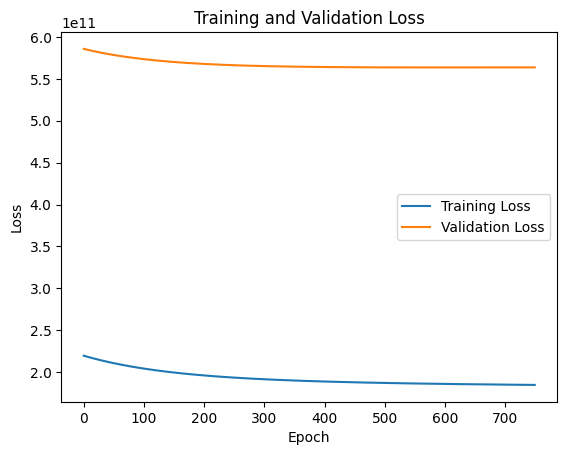

In [282]:
class LinearRegression:

    def __init__(self, X, y, b):
        self.X = X
        self.y = y
        self.weights = np.random.rand(1, X.shape[1]) # np.array([0.27345584, 0.14737092, 0.97348671, 0.22809421])
        self.bias = b

    def predict(self, X):

        # print("X = ", X.shape)
        # print("weights = ",(self.weights).shape)

        y_hat = X @ self.weights.T + self.bias
        return y_hat

    def costFunc(self, X, y, w, b):
        m, n = X.shape
        fwb = X @ w.T + b
        cost = np.sum((1 / (2*m))*((fwb - y)**2),axis=0)
        return cost

    def gradientFunc(self, X, y, w, b):
        m, n = X.shape
        fwb = X @ w.T + b
        gradient = (1 / m)*((fwb - y).T @ X)
        return gradient

    def gradientDescentFunc(self, X, y, w, b, lr):
        self.weights -= lr * self.gradientFunc(X, y, w, b)

    def train(self, X_test, y_test, epochs, lr):
        train_costs = []
        test_costs = []
        for index in range(epochs):
            self.gradientDescentFunc(self.X, self.y, self.weights, self.bias, lr)
            train_cost = self.costFunc(self.X, self.y, self.weights, self.bias)
            test_cost = self.costFunc(X_test, y_test, self.weights, self.bias)
            train_costs.append(train_cost)
            test_costs.append(test_cost)
        plt.plot(train_costs, label='Training Loss')
        plt.plot(test_costs, label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


np.set_printoptions(suppress=True)

linearReg = LinearRegression(X_train, y_train, b=0)

# linearReg.train(2000, 0.001)
linearReg.train(X_test, y_test, 750, 0.001)



In [283]:
x_predict = X_train[0].reshape(-1,1).T
y_predict = y_train[0].reshape(-1,1).T
print(x_predict)

print("The array is:", x_predict.tolist())
print("The array is:", y_predict.tolist())

linearReg.predict(x_predict)


[[-0.44112227 -0.84320364 -0.29004913 -0.19201263 -0.9513876  -0.08500441
  -0.30919434 -0.6671122  -0.72762259  0.7496841  -0.26191277  1.22473384]]
The array is: [[-0.4411222714257526, -0.8432036422165167, -0.29004912724509424, -0.19201263304554678, -0.9513875969275055, -0.08500441132823326, -0.3091943441524168, -0.6671122005602909, -0.72762259335368, 0.7496841033484234, -0.26191277182292283, 1.224733843001221]]
The array is: [[288350.0]]


array([[-113668.94325493]])

(4600, 18)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')
(4600, 13)
(4600, 18)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')
(4600, 13)


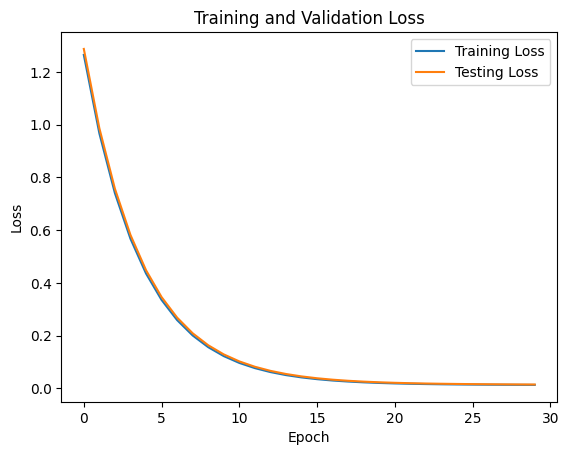

[[0.55555556 0.34375    0.26279423 0.01225992 0.4        1.
  1.         0.5        0.38285398 0.         0.51754386 0.98311817]]
The array is: [[0.5555555555555556, 0.34375, 0.2627942293090357, 0.012259915423163622, 0.4, 1.0, 1.0, 0.5, 0.38285398230088497, 0.0, 0.5175438596491233, 0.9831181727904668]]
The array is: [[542500.]]
[[-871614.16223653]]


In [374]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data_orig = pd.read_csv("HousePrices_data.csv")
data = data_orig.copy()
print(data.shape)
data
data = data.drop(['date', 'street','city','statezip','country'], axis=1)
print(data.columns)

data
print(data.shape)
data = data.to_numpy()
np.set_printoptions(suppress=True)
data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data_orig = pd.read_csv("HousePrices_data.csv")
data = data_orig.copy()
print(data.shape)
data = data.drop(['date', 'street','city','statezip','country'], axis=1)
print(data.columns)

data
print(data.shape)
data = data.to_numpy()
np.set_printoptions(suppress=True)
data

# 26590000.0
# 7062500.0
# Split the data into X and y
# y = data[:, [0]]
# data = np.delete(data, 0, axis=1)
# X = (data - np.min(data)) / (np.max(data) - np.min(data)) # normalize(data, axis=0, norm='l1')


# # Split the data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
# Split the data into X and y
y = data[:, [0]]
data = np.delete(data, 0, axis=1)

# Initialize a scaler for the features and the target
X_scaler = MinMaxScaler().fit(data)
y_scaler = MinMaxScaler().fit(y)

# Transform the datasets
X = X_scaler.transform(data)
y = y_scaler.transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25)


class LinearRegression:

    def __init__(self, X, y, b):
        self.X = X
        self.y = y
        self.weights = np.random.rand(1, X.shape[1]) # np.array([0.27345584, 0.14737092, 0.97348671, 0.22809421])
        self.bias = b

    def predict(self, x):

        y_hat = x @ self.weights.T + self.bias
        return y_hat

    def costFunc(self, X, y, w, b):
        m, n = X.shape
        fwb = X @ w.T + b
        cost = np.sum((1 / (2*m))*((fwb - y)**2),axis=0)
        return cost

    def gradientFunc(self, X, y, w, b):
        m, n = X.shape
        fwb = X @ w.T + b
        gradient = (1 / m)*((fwb - y).T @ X)
        return gradient

    def gradientDescentFunc(self, X, y, w, b, lr):
        self.weights -= lr * self.gradientFunc(X, y, w, b)

    def train(self, X_test, y_test, epochs, lr):
        train_costs = []
        test_costs = []
        for index in range(epochs):
            self.gradientDescentFunc(self.X, self.y, self.weights, self.bias, lr)

            train_cost = self.costFunc(self.X, self.y, self.weights, self.bias)
            test_cost = self.costFunc(X_test, y_test, self.weights, self.bias)

            train_costs.append(train_cost)
            test_costs.append(test_cost)
        # Normalize the costs
        # train_costs = (train_costs - np.min(train_costs)) / (np.max(train_costs) - np.min(train_costs))
        # test_costs = (test_costs - np.min(test_costs)) / (np.max(test_costs) - np.min(test_costs))
        plt.plot(train_costs, label='Training Loss')
        plt.plot(test_costs, label='Testing Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


np.set_printoptions(suppress=True)

linearReg = LinearRegression(X_train, y_train, b=0)

# linearReg.train(2000, 0.001)
linearReg.train(X_test, y_test, 30, 0.1)

x_predict = X_test[0].reshape(-1,1).T
y_predict = y_test[0].reshape(-1,1).T
print(x_predict)

print("The array is:", x_predict.tolist())
print("The array is:", y_scaler.inverse_transform(y_predict))

# Make a prediction
x_predict = X_train[1].reshape(-1,1).T
y_predict = linearReg.predict(x_predict)

# Inverse transform to get original values
y_predict_orig = y_scaler.inverse_transform(y_predict)
print(y_predict_orig)



Epoch 1/30
108/108 [==============================] - 0s 2ms/step - loss: 0.0721 - val_loss: 0.0263
Epoch 2/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.0225
Epoch 3/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0216
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0206
Epoch 5/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0203
Epoch 6/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0218 - val_loss: 0.0205
Epoch 7/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0197
Epoch 8/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0195
Epoch 9/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0212 - val_loss: 0.0196
Epoch 10/30
108/108 [==============================] - 0s 1ms/step - loss: 0.0212 - val_loss: 0.0193

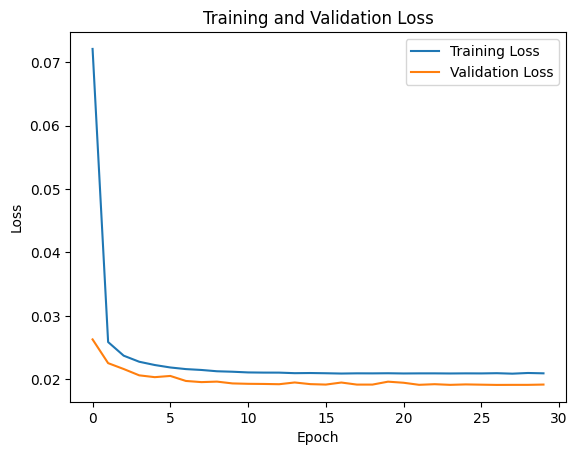

KeyboardInterrupt: 

In [382]:
from sklearn.preprocessing import MinMaxScaler

# Split the data into X and y
y = data[:, [0]]
data = np.delete(data, 0, axis=1)

# Initialize a scaler for the features and the target
X_scaler = MinMaxScaler().fit(data)
y_scaler = MinMaxScaler().fit(y)

# Transform the datasets
X = X_scaler.transform(data)
y = y_scaler.transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make a prediction
x_predict = X_train[1].reshape(-1,1).T
y_predict = model.predict(x_predict)

# Inverse transform to get original values
y_predict_orig = y_scaler.inverse_transform(y_predict)
print(y_predict_orig)
